In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import QuantileTransformer, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.svm import  LinearSVR

In [4]:
dd = pd.read_csv("data/dd.csv")
hd = pd.read_csv("data/hd.csv")

In [5]:
dd[dd['date'] < '2012-01-01']['count'].mean()

3405.7616438356163

In [6]:
dd.head()

,date,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count,season,rain,snow,israin,issnow
0,2011-01-01,0,1,0,6,0,2,0.344167,0.363625,0.913930,0.160446,331,654,985,3,0.029904,0.0,1,0
1,2011-01-02,0,1,0,0,0,2,0.363478,0.353739,0.678024,0.248539,131,670,801,3,0.035885,0.0,1,0
2,2011-01-03,0,1,0,1,1,1,0.196364,0.189405,0.236453,0.248309,120,1229,1349,3,0.000000,0.0,0,0
3,2011-01-04,0,1,0,2,1,1,0.200000,0.212122,0.445402,0.160296,108,1454,1562,3,0.000000,0.0,0,0
4,2011-01-05,0,1,0,3,1,1,0.226957,0.229270,0.467980,0.186900,82,1518,1600,3,0.000000,0.0,0,0


<Axes: >

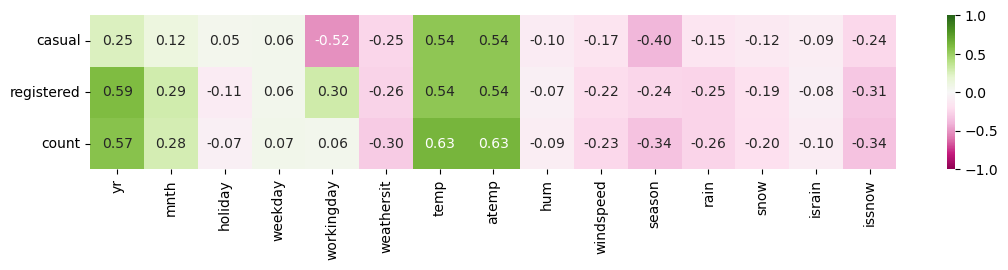

In [7]:
fig, ax = plt.subplots(figsize=(13, 2))

sns.heatmap(
        dd.corr(numeric_only=True).iloc[10:13, np.r_[0:10, 13:18]],  
        annot=True,
        fmt=".2f",
        cmap="PiYG",
        # mask=mask,
        vmin=-1,
        vmax=1,
)

<Axes: >

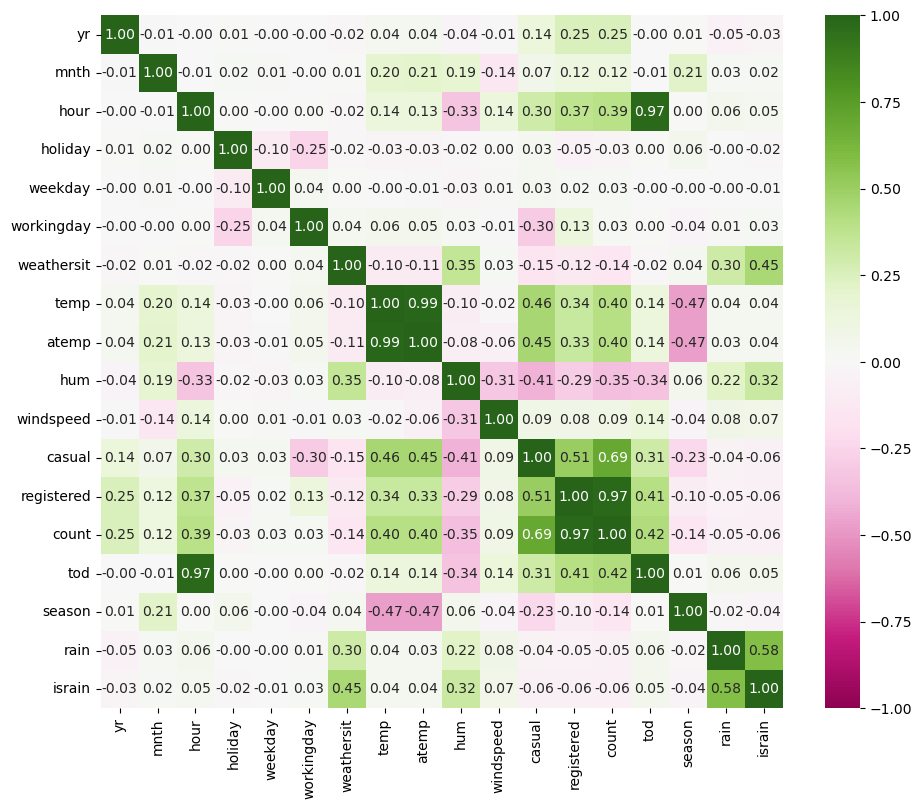

In [8]:
fig, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(
        hd.corr(numeric_only=True),
        annot=True,
        fmt=".2f",
        cmap="PiYG",
        # mask=mask,
        vmin=-1,
        vmax=1,
)

In [9]:
# enc = OneHotEncoder(sparse=False)
# data = dd[['season']].values.reshape(1, -1)
# enc.fit(data)
# enc_f = enc.transform(data)
# enc_wd = pd.DataFrame(enc_f, columns=enc.get_feature_names_out(data))

In [10]:
def choose_features():
    return ['temp']

In [17]:
def linreg(data, features):
    X = data[features].values
    y = data["casual"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.1, random_state=42
    )

    pipe = Pipeline(
        [
            # ("scaler", StandardScaler()),
            # Model is a ML Algorithm, Logistic Regression is good for binary classification
            ("model", LinearRegression()),
        ]
    )

    pipe.fit(X_train, y_train)

    y_pred = pipe.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print(r2)
    print(mse)
    print(mae)

    fig, ax = plt.subplots(figsize=(8, 5))
    sns.scatterplot(y=dd['count'], x=dd['temp'], ax=ax) 
    sns.lineplot(x=X_test.reshape(1, -1)[0], y=y_pred, ax=ax, color='r') 
    plt.show()

0.4271440450346782
251182.7312499692
346.875636886311


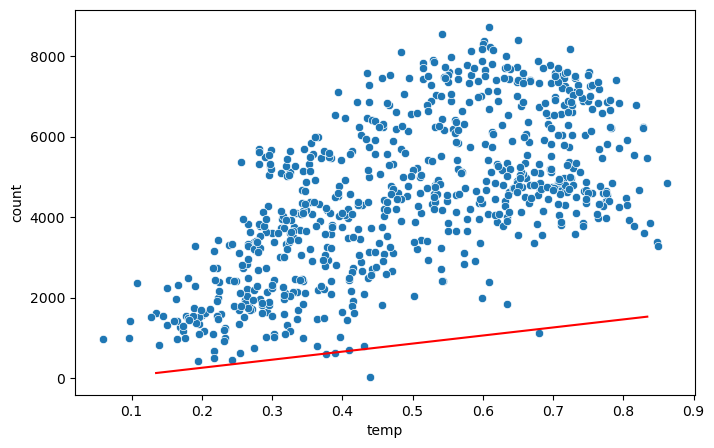

In [18]:
linreg(dd, ['temp'])

In [ ]:
linreg(hd, 'tod')